In [399]:
import pandas as pd
import numpy as np

# Text similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)


In [400]:
df_enrol = pd.read_csv(r"enrolment_combined.csv")

In [401]:
print(df_enrol.shape)

(1006029, 7)


In [402]:
df_enrol.head()
df_enrol.info()
df_enrol.isna().mean().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


date              0.0
state             0.0
district          0.0
pincode           0.0
age_0_5           0.0
age_5_17          0.0
age_18_greater    0.0
dtype: float64

In [403]:
print("Unique states (before):", df_enrol["state"].nunique())
print("Unique districts (before):", df_enrol["district"].nunique())


Unique states (before): 55
Unique districts (before): 985


In [404]:
df_enrol["state"].value_counts().head(56)


state
Uttar Pradesh                                   110369
Tamil Nadu                                       92552
Maharashtra                                      77191
West Bengal                                      76519
Karnataka                                        70198
Andhra Pradesh                                   65658
Bihar                                            60567
Rajasthan                                        56159
Madhya Pradesh                                   50225
Gujarat                                          46624
Odisha                                           43691
Telangana                                        42774
Kerala                                           39145
Assam                                            31827
Jharkhand                                        23218
Punjab                                           20439
Chhattisgarh                                     18550
Haryana                                          15997
Jamm

In [405]:
STATE_FIX = {
    # West Bengal
    "WEST  BENGAL": "WEST BENGAL",
    "WEST BANGAL": "WEST BENGAL",
    "WESTBENGAL": "WEST BENGAL",
    "WEST BENGAL ": "WEST BENGAL",
    "WESTBENGAL ": "WEST BENGAL",
    "WESTBENGAL": "WEST BENGAL",

    # Odisha
    "ORISSA": "ODISHA",

    # Andhra Pradesh
    "ANDHRA PRADESH ": "ANDHRA PRADESH",
    "andhra pradesh": "ANDHRA PRADESH",

    # Jammu & Kashmir
    "JAMMU & KASHMIR": "JAMMU AND KASHMIR",
    "JAMMU AND KASHMIR ": "JAMMU AND KASHMIR",
    "JAMMU AND KASHMIR": "JAMMU AND KASHMIR",

    # Dadra & Daman merged UT
    "DADRA AND NAGAR HAVELI": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "DADRA & NAGAR HAVELI": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "DAMAN AND DIU": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "DADRA AND NAGAR HAVELI AND DAMAN AND DIU": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU"
}


In [406]:
# Ensure state is normalized first
df_enrol["state"] = (
    df_enrol["state"]
    .astype(str)
    .str.upper()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

# Create spell flag
df_enrol["state_spell_flag"] = df_enrol["state"].apply(
    lambda x: 1 if x in STATE_FIX else 0
)


In [407]:
print("Unique states (after):", df_enrol["state"].nunique())
df_enrol["state"].value_counts().head(51)

Unique states (after): 48


state
UTTAR PRADESH                                   110369
TAMIL NADU                                       92552
MAHARASHTRA                                      77191
WEST BENGAL                                      76545
KARNATAKA                                        70198
ANDHRA PRADESH                                   65663
BIHAR                                            60567
RAJASTHAN                                        56159
MADHYA PRADESH                                   50225
GUJARAT                                          46624
ODISHA                                           43692
TELANGANA                                        42774
KERALA                                           39145
ASSAM                                            31827
JHARKHAND                                        23218
PUNJAB                                           20439
CHHATTISGARH                                     18550
HARYANA                                          15997
JAMM

In [408]:
df_enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date              1006029 non-null  object
 1   state             1006029 non-null  object
 2   district          1006029 non-null  object
 3   pincode           1006029 non-null  int64 
 4   age_0_5           1006029 non-null  int64 
 5   age_5_17          1006029 non-null  int64 
 6   age_18_greater    1006029 non-null  int64 
 7   state_spell_flag  1006029 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 61.4+ MB


In [409]:
df_enrol["state_clean"] = df_enrol["state"].replace(STATE_FIX)


In [410]:
df_enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   date              1006029 non-null  object
 1   state             1006029 non-null  object
 2   district          1006029 non-null  object
 3   pincode           1006029 non-null  int64 
 4   age_0_5           1006029 non-null  int64 
 5   age_5_17          1006029 non-null  int64 
 6   age_18_greater    1006029 non-null  int64 
 7   state_spell_flag  1006029 non-null  int64 
 8   state_clean       1006029 non-null  object
dtypes: int64(5), object(4)
memory usage: 69.1+ MB


In [411]:
df_enrol["state_spell_flag"].value_counts()


state_spell_flag
0    990843
1     15186
Name: count, dtype: int64

In [412]:
df_enrol[df_enrol["state_spell_flag"] == 1][["state", "state_clean"]].drop_duplicates().head(50)


,state,state_clean
657,JAMMU AND KASHMIR,JAMMU AND KASHMIR
1604,THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU,DADRA AND NAGAR HAVELI AND DAMAN AND DIU
3806,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,DADRA AND NAGAR HAVELI AND DAMAN AND DIU
5202,ORISSA,ODISHA
11059,DADRA & NAGAR HAVELI,DADRA AND NAGAR HAVELI AND DAMAN AND DIU
11060,DADRA AND NAGAR HAVELI,DADRA AND NAGAR HAVELI AND DAMAN AND DIU
11061,DAMAN AND DIU,DADRA AND NAGAR HAVELI AND DAMAN AND DIU
14476,JAMMU & KASHMIR,JAMMU AND KASHMIR
39929,WEST BANGAL,WEST BENGAL
66338,WESTBENGAL,WEST BENGAL


In [413]:
df_enrol["state_clean"].value_counts().head(45)


state_clean
UTTAR PRADESH                               110369
TAMIL NADU                                   92552
MAHARASHTRA                                  77191
WEST BENGAL                                  76561
KARNATAKA                                    70198
ANDHRA PRADESH                               65663
BIHAR                                        60567
RAJASTHAN                                    56159
MADHYA PRADESH                               50225
ODISHA                                       47011
GUJARAT                                      46624
TELANGANA                                    42774
KERALA                                       39145
ASSAM                                        31827
JHARKHAND                                    23218
PUNJAB                                       20439
CHHATTISGARH                                 18550
HARYANA                                      15997
JAMMU AND KASHMIR                            11455
HIMACHAL PRADESH   

In [414]:
df_enrol.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_spell_flag,state_clean
0,02-03-2025,MEGHALAYA,East Khasi Hills,793121,11,61,37,0,MEGHALAYA
1,09-03-2025,KARNATAKA,Bengaluru Urban,560043,14,33,39,0,KARNATAKA
2,09-03-2025,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,0,UTTAR PRADESH
3,09-03-2025,UTTAR PRADESH,Aligarh,202133,62,29,15,0,UTTAR PRADESH
4,09-03-2025,KARNATAKA,Bengaluru Urban,560016,14,16,21,0,KARNATAKA
5,09-03-2025,BIHAR,Sitamarhi,843331,20,49,12,0,BIHAR
6,09-03-2025,BIHAR,Sitamarhi,843330,23,24,42,0,BIHAR
7,09-03-2025,UTTAR PRADESH,Bahraich,271865,26,60,14,0,UTTAR PRADESH
8,09-03-2025,UTTAR PRADESH,Firozabad,283204,28,26,10,0,UTTAR PRADESH
9,09-03-2025,BIHAR,Purbi Champaran,845418,30,48,10,0,BIHAR


In [415]:
print("Unique state_clean (before):", df_enrol["state_clean"].nunique())


Unique state_clean (before): 40


In [416]:
FINAL_STATE_MAP = {
    # Legacy / spelling variants
    "PONDICHERRY": "PUDUCHERRY",
    "ORISSA": "ODISHA",

    # Andaman variants
    "ANDAMAN & NICOBAR ISLANDS": "ANDAMAN AND NICOBAR ISLANDS",

    # UT merge
    "DAMAN & DIU": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "DAMAN AND DIU": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU",
    "DADRA AND NAGAR HAVELI": "DADRA AND NAGAR HAVELI AND DAMAN AND DIU"
}


In [417]:
df_enrol["state_final"] = df_enrol["state_clean"].replace(FINAL_STATE_MAP)


In [418]:
VALID_36 = {
    "ANDHRA PRADESH","ARUNACHAL PRADESH","ASSAM","BIHAR","CHHATTISGARH","GOA",
    "GUJARAT","HARYANA","HIMACHAL PRADESH","JHARKHAND","KARNATAKA","KERALA",
    "MADHYA PRADESH","MAHARASHTRA","MANIPUR","MEGHALAYA","MIZORAM","NAGALAND",
    "ODISHA","PUNJAB","RAJASTHAN","SIKKIM","TAMIL NADU","TELANGANA","TRIPURA",
    "UTTAR PRADESH","UTTARAKHAND","WEST BENGAL",
    "ANDAMAN AND NICOBAR ISLANDS","CHANDIGARH",
    "DADRA AND NAGAR HAVELI AND DAMAN AND DIU","DELHI",
    "JAMMU AND KASHMIR","LADAKH","LAKSHADWEEP","PUDUCHERRY"
}


In [419]:
df_enrol["state_final_valid"] = df_enrol["state_final"].apply(
    lambda x: 1 if x in VALID_36 else 0
)


In [420]:
df_enrol["state_final"].nunique()
df_enrol["state_final"].value_counts().head(45)



state_final
UTTAR PRADESH                               110369
TAMIL NADU                                   92552
MAHARASHTRA                                  77191
WEST BENGAL                                  76561
KARNATAKA                                    70198
ANDHRA PRADESH                               65663
BIHAR                                        60567
RAJASTHAN                                    56159
MADHYA PRADESH                               50225
ODISHA                                       47011
GUJARAT                                      46624
TELANGANA                                    42774
KERALA                                       39145
ASSAM                                        31827
JHARKHAND                                    23218
PUNJAB                                       20439
CHHATTISGARH                                 18550
HARYANA                                      15997
JAMMU AND KASHMIR                            11455
HIMACHAL PRADESH   

In [421]:
df_enrol.loc[df_enrol["state_final"] == "100000", "state_final"] = np.nan


In [422]:
df_enrol["state_final"].value_counts().head(45)


state_final
UTTAR PRADESH                               110369
TAMIL NADU                                   92552
MAHARASHTRA                                  77191
WEST BENGAL                                  76561
KARNATAKA                                    70198
ANDHRA PRADESH                               65663
BIHAR                                        60567
RAJASTHAN                                    56159
MADHYA PRADESH                               50225
ODISHA                                       47011
GUJARAT                                      46624
TELANGANA                                    42774
KERALA                                       39145
ASSAM                                        31827
JHARKHAND                                    23218
PUNJAB                                       20439
CHHATTISGARH                                 18550
HARYANA                                      15997
JAMMU AND KASHMIR                            11455
HIMACHAL PRADESH   

In [423]:
df_enrol["state_final"] = (
    df_enrol["state_final"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)


In [424]:
df_enrol["state_final"].nunique()


37

In [425]:
VALID_36 = {
    "ANDHRA PRADESH","ARUNACHAL PRADESH","ASSAM","BIHAR","CHHATTISGARH","GOA",
    "GUJARAT","HARYANA","HIMACHAL PRADESH","JHARKHAND","KARNATAKA","KERALA",
    "MADHYA PRADESH","MAHARASHTRA","MANIPUR","MEGHALAYA","MIZORAM","NAGALAND",
    "ODISHA","PUNJAB","RAJASTHAN","SIKKIM","TAMIL NADU","TELANGANA","TRIPURA",
    "UTTAR PRADESH","UTTARAKHAND","WEST BENGAL",
    "ANDAMAN AND NICOBAR ISLANDS","CHANDIGARH",
    "DADRA AND NAGAR HAVELI AND DAMAN AND DIU","DELHI",
    "JAMMU AND KASHMIR","LADAKH","LAKSHADWEEP","PUDUCHERRY"
}

df_enrol["state_final_nonvalid"] = df_enrol["state_final"].apply(
    lambda x: 0 if x in VALID_36 else 1
)


In [426]:
df_enrol = df_enrol.drop(columns=["state_final_valid"], errors="ignore")


In [427]:
df_enrol.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_spell_flag,state_clean,state_final,state_final_nonvalid
0,02-03-2025,MEGHALAYA,East Khasi Hills,793121,11,61,37,0,MEGHALAYA,MEGHALAYA,0
1,09-03-2025,KARNATAKA,Bengaluru Urban,560043,14,33,39,0,KARNATAKA,KARNATAKA,0
2,09-03-2025,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,0,UTTAR PRADESH,UTTAR PRADESH,0
3,09-03-2025,UTTAR PRADESH,Aligarh,202133,62,29,15,0,UTTAR PRADESH,UTTAR PRADESH,0
4,09-03-2025,KARNATAKA,Bengaluru Urban,560016,14,16,21,0,KARNATAKA,KARNATAKA,0
5,09-03-2025,BIHAR,Sitamarhi,843331,20,49,12,0,BIHAR,BIHAR,0
6,09-03-2025,BIHAR,Sitamarhi,843330,23,24,42,0,BIHAR,BIHAR,0
7,09-03-2025,UTTAR PRADESH,Bahraich,271865,26,60,14,0,UTTAR PRADESH,UTTAR PRADESH,0
8,09-03-2025,UTTAR PRADESH,Firozabad,283204,28,26,10,0,UTTAR PRADESH,UTTAR PRADESH,0
9,09-03-2025,BIHAR,Purbi Champaran,845418,30,48,10,0,BIHAR,BIHAR,0


In [428]:
df_enrol.head()
df_enrol.info()
df_enrol.isna().mean().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   date                  1006029 non-null  object
 1   state                 1006029 non-null  object
 2   district              1006029 non-null  object
 3   pincode               1006029 non-null  int64 
 4   age_0_5               1006029 non-null  int64 
 5   age_5_17              1006029 non-null  int64 
 6   age_18_greater        1006029 non-null  int64 
 7   state_spell_flag      1006029 non-null  int64 
 8   state_clean           1006029 non-null  object
 9   state_final           1006029 non-null  object
 10  state_final_nonvalid  1006029 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 84.4+ MB


date                    0.0
state                   0.0
district                0.0
pincode                 0.0
age_0_5                 0.0
age_5_17                0.0
age_18_greater          0.0
state_spell_flag        0.0
state_clean             0.0
state_final             0.0
state_final_nonvalid    0.0
dtype: float64

In [429]:
df_enrol["date"] = pd.to_datetime(
    df_enrol["date"],
    dayfirst=True,
    errors="coerce"
)
df_enrol["date"].min(), df_enrol["date"].max()

(Timestamp('2025-03-02 00:00:00'), Timestamp('2025-12-31 00:00:00'))

In [430]:
AGE_COLS = ["age_0_5", "age_5_17", "age_18_greater"]

for col in AGE_COLS:
    df_enrol[col] = pd.to_numeric(df_enrol[col], errors="coerce")


In [431]:
df_enrol["total_enrolment"] = (
    df_enrol["age_0_5"] +
    df_enrol["age_5_17"] +
    df_enrol["age_18_greater"]
)


In [432]:
df_enrol[
    ["age_0_5", "age_5_17", "age_18_greater", "total_enrolment"]
].head()


,age_0_5,age_5_17,age_18_greater,total_enrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


In [433]:
df_enrol.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_spell_flag,state_clean,state_final,state_final_nonvalid,total_enrolment
0,2025-03-02,MEGHALAYA,East Khasi Hills,793121,11,61,37,0,MEGHALAYA,MEGHALAYA,0,109
1,2025-03-09,KARNATAKA,Bengaluru Urban,560043,14,33,39,0,KARNATAKA,KARNATAKA,0,86
2,2025-03-09,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,0,UTTAR PRADESH,UTTAR PRADESH,0,123
3,2025-03-09,UTTAR PRADESH,Aligarh,202133,62,29,15,0,UTTAR PRADESH,UTTAR PRADESH,0,106
4,2025-03-09,KARNATAKA,Bengaluru Urban,560016,14,16,21,0,KARNATAKA,KARNATAKA,0,51
5,2025-03-09,BIHAR,Sitamarhi,843331,20,49,12,0,BIHAR,BIHAR,0,81
6,2025-03-09,BIHAR,Sitamarhi,843330,23,24,42,0,BIHAR,BIHAR,0,89
7,2025-03-09,UTTAR PRADESH,Bahraich,271865,26,60,14,0,UTTAR PRADESH,UTTAR PRADESH,0,100
8,2025-03-09,UTTAR PRADESH,Firozabad,283204,28,26,10,0,UTTAR PRADESH,UTTAR PRADESH,0,64
9,2025-03-09,BIHAR,Purbi Champaran,845418,30,48,10,0,BIHAR,BIHAR,0,88


In [434]:
state_enrolment = (
    df_enrol
    .groupby("state_final", dropna=False)["total_enrolment"]
    .sum()
    .reset_index()
)



In [435]:
state_enrolment["state_final"] = state_enrolment["state_final"].fillna("INVALID / GARBAGE")


In [436]:
state_enrolment = state_enrolment.sort_values(
    "total_enrolment", ascending=False
)


C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\3840570320.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


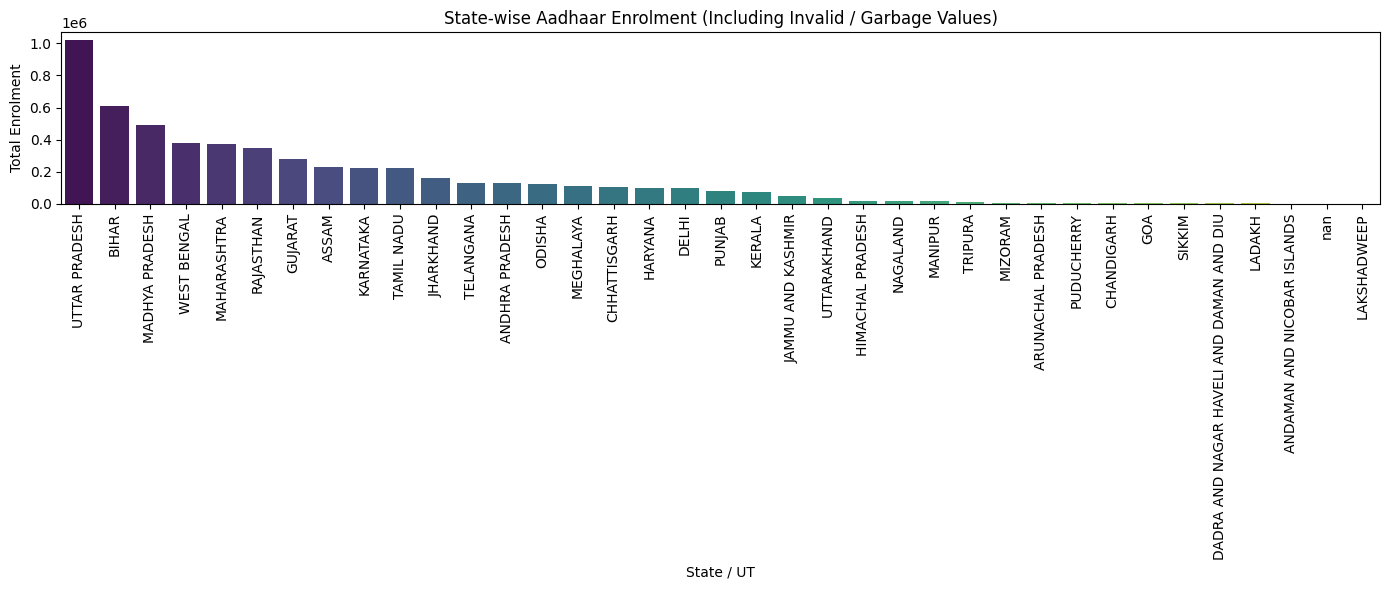

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.barplot(
    data=state_enrolment,
    x="state_final",
    y="total_enrolment",
    palette="viridis"
)

plt.xticks(rotation=90)
plt.xlabel("State / UT")
plt.ylabel("Total Enrolment")
plt.title("State-wise Aadhaar Enrolment (Including Invalid / Garbage Values)")

plt.tight_layout()
plt.show()


C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\896200921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


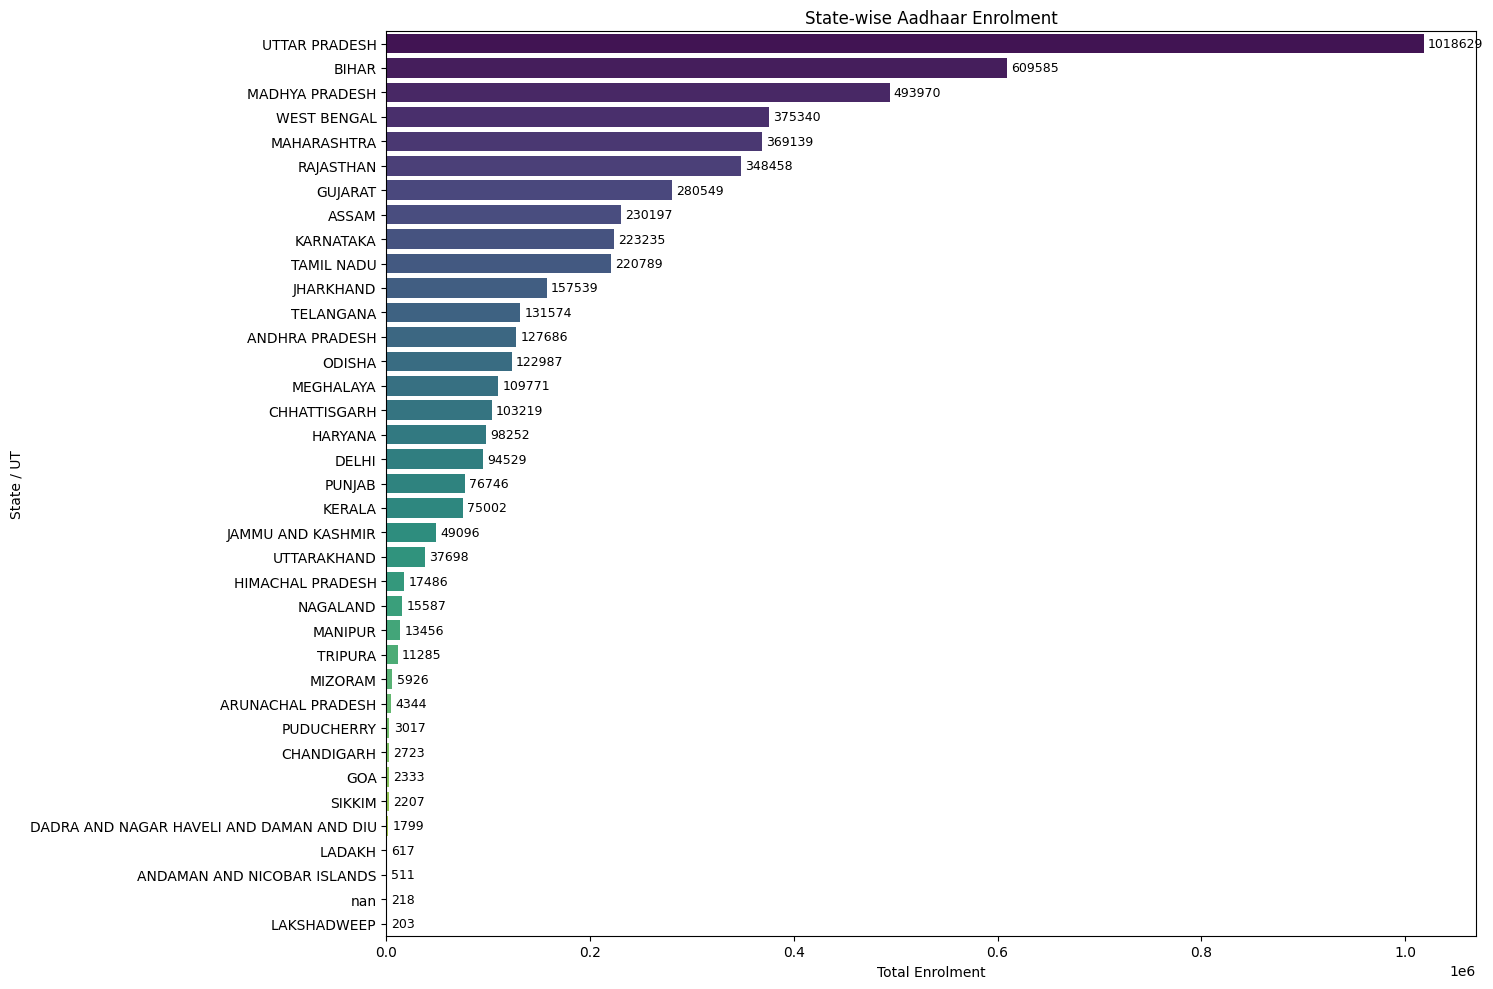

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

ax = sns.barplot(
    data=state_enrolment,
    y="state_final",          # STATES on Y-axis
    x="total_enrolment",      # ENROLMENT on X-axis
    palette="viridis"
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.0f",            # no decimals
        label_type="edge",
        padding=3,
        fontsize=9
    )

plt.xlabel("Total Enrolment")
plt.ylabel("State / UT")
plt.title("State-wise Aadhaar Enrolment")

plt.tight_layout()
plt.show()


In [439]:
age_totals = {
    "Age 0–5": df_enrol["age_0_5"].sum(),
    "Age 5–17": df_enrol["age_5_17"].sum(),
    "Age 18+": df_enrol["age_18_greater"].sum()
}
age_df = (
    pd.DataFrame(list(age_totals.items()), columns=["Age Group", "Total Enrolment"])
)


C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\2288886216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


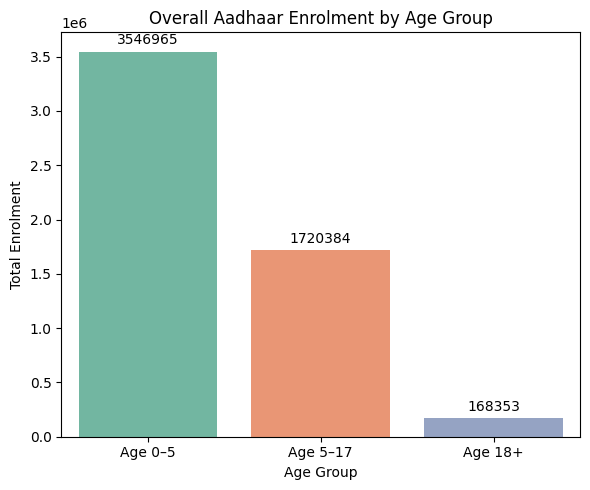

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))

ax = sns.barplot(
    data=age_df,
    x="Age Group",
    y="Total Enrolment",
    palette="Set2"
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("Overall Aadhaar Enrolment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolment")

plt.tight_layout()
plt.show()


In [441]:
state_age_enrolment = (
    df_enrol
    .groupby("state_final", dropna=False)[
        ["age_0_5", "age_5_17", "age_18_greater"]
    ]
    .sum()
    .reset_index()
)

# Label garbage states clearly
state_age_enrolment["state_final"] = (
    state_age_enrolment["state_final"]
    .fillna("INVALID / GARBAGE")
)




C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\582888661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


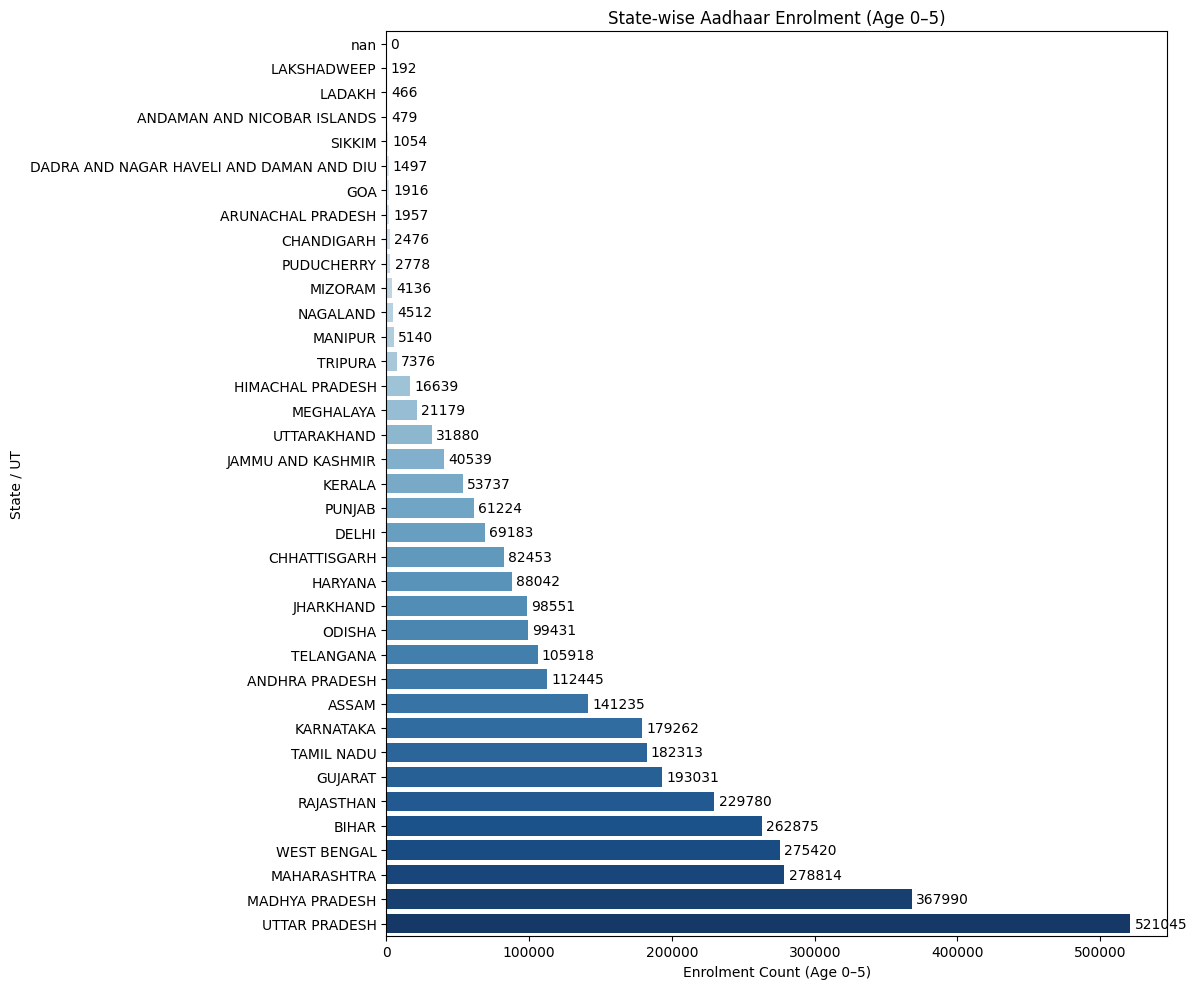

In [442]:
plt.figure(figsize=(12, 10))

ax = sns.barplot(
    data=state_age_enrol.sort_values("age_0_5", ascending=True),
    y="state_final",
    x="age_0_5",
    palette="Blues"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("State-wise Aadhaar Enrolment (Age 0–5)")
plt.xlabel("Enrolment Count (Age 0–5)")
plt.ylabel("State / UT")

plt.tight_layout()
plt.show()



C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\2192073167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


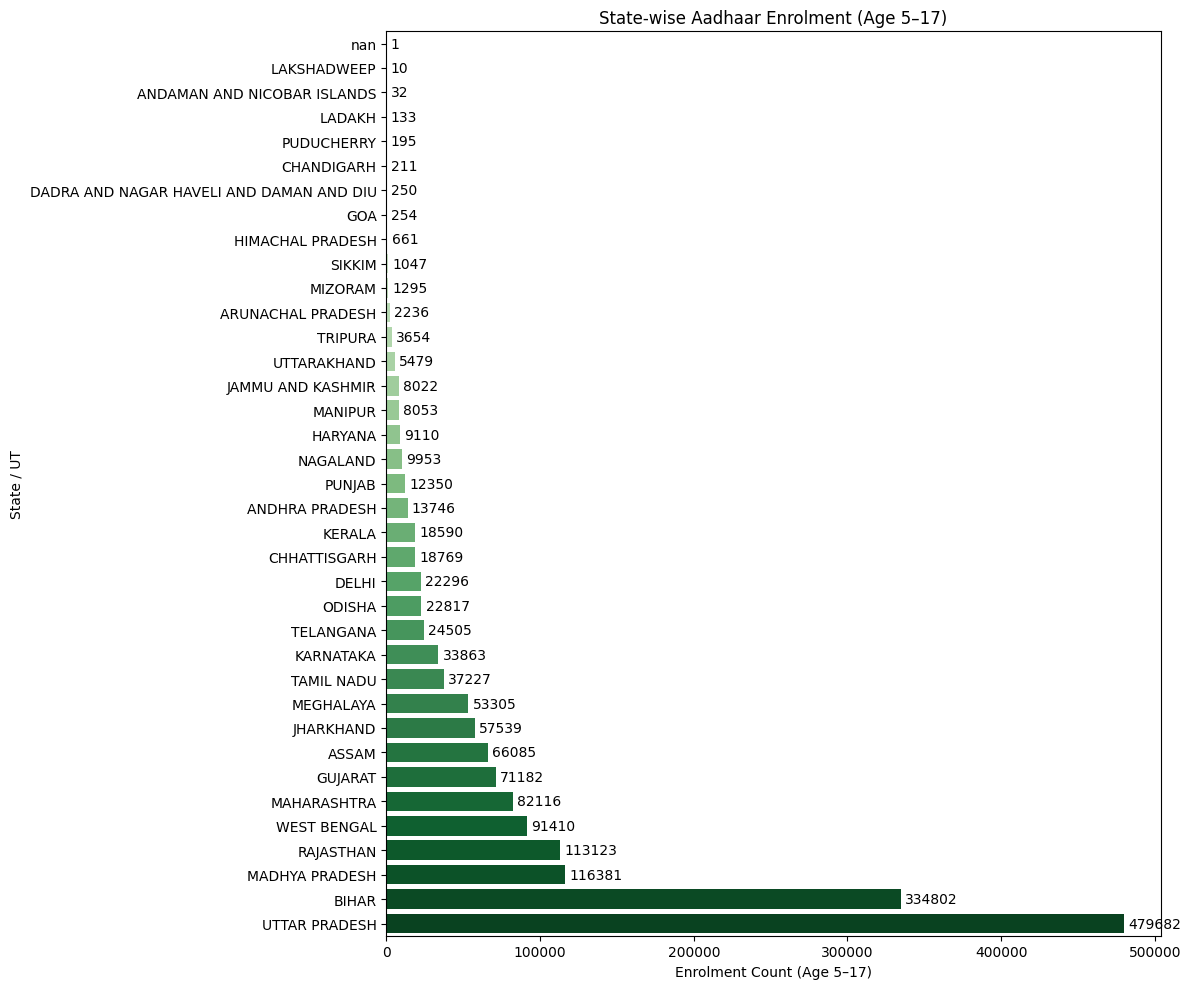

In [443]:
plt.figure(figsize=(12, 10))

ax = sns.barplot(
    data=state_age_enrol.sort_values("age_5_17", ascending=True),
    y="state_final",
    x="age_5_17",
    palette="Greens"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("State-wise Aadhaar Enrolment (Age 5–17)")
plt.xlabel("Enrolment Count (Age 5–17)")
plt.ylabel("State / UT")

plt.tight_layout()
plt.show()


C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\2856139836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


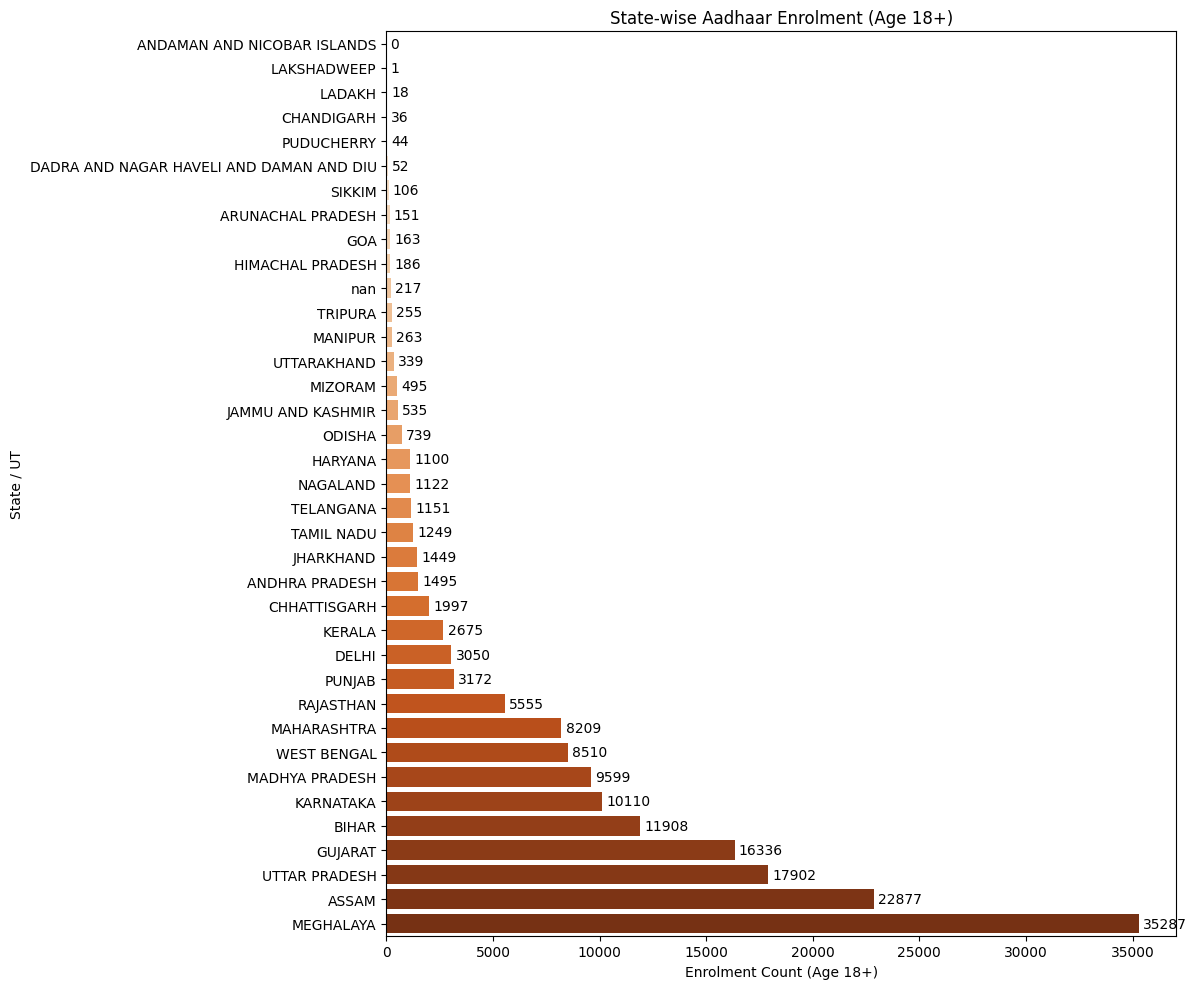

In [444]:
plt.figure(figsize=(12, 10))

ax = sns.barplot(
    data=state_age_enrol.sort_values("age_18_greater", ascending=True),
    y="state_final",
    x="age_18_greater",
    palette="Oranges"
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("State-wise Aadhaar Enrolment (Age 18+)")
plt.xlabel("Enrolment Count (Age 18+)")
plt.ylabel("State / UT")

plt.tight_layout()
plt.show()


In [445]:
df_enrol.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_spell_flag,state_clean,state_final,state_final_nonvalid,total_enrolment
0,2025-03-02,MEGHALAYA,East Khasi Hills,793121,11,61,37,0,MEGHALAYA,MEGHALAYA,0,109
1,2025-03-09,KARNATAKA,Bengaluru Urban,560043,14,33,39,0,KARNATAKA,KARNATAKA,0,86
2,2025-03-09,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,0,UTTAR PRADESH,UTTAR PRADESH,0,123
3,2025-03-09,UTTAR PRADESH,Aligarh,202133,62,29,15,0,UTTAR PRADESH,UTTAR PRADESH,0,106
4,2025-03-09,KARNATAKA,Bengaluru Urban,560016,14,16,21,0,KARNATAKA,KARNATAKA,0,51
5,2025-03-09,BIHAR,Sitamarhi,843331,20,49,12,0,BIHAR,BIHAR,0,81
6,2025-03-09,BIHAR,Sitamarhi,843330,23,24,42,0,BIHAR,BIHAR,0,89
7,2025-03-09,UTTAR PRADESH,Bahraich,271865,26,60,14,0,UTTAR PRADESH,UTTAR PRADESH,0,100
8,2025-03-09,UTTAR PRADESH,Firozabad,283204,28,26,10,0,UTTAR PRADESH,UTTAR PRADESH,0,64
9,2025-03-09,BIHAR,Purbi Champaran,845418,30,48,10,0,BIHAR,BIHAR,0,88


In [446]:
df_enrol["date"].min(), df_enrol["date"].max()


(Timestamp('2025-03-02 00:00:00'), Timestamp('2025-12-31 00:00:00'))

In [447]:
df_enrol["date"].astype(str).value_counts().head(20)


date
2025-12-15    19426
2025-10-30    19010
2025-11-15    18628
2025-12-22    18557
2025-11-19    18534
2025-10-17    18361
2025-11-02    18080
2025-12-31    17746
2025-09-09    16789
2025-09-08    16768
2025-11-18    16603
2025-09-10    16518
2025-10-13    16334
2025-10-31    16192
2025-09-12    16107
2025-09-01    15971
2025-09-11    15950
2025-11-25    15890
2025-11-05    15745
2025-09-02    15622
Name: count, dtype: int64

In [448]:
df_enrol["date"] = pd.to_datetime(
    df_enrol["date"],
    dayfirst=True,
    errors="coerce"
)
df_enrol["date"].min(), df_enrol["date"].max()

(Timestamp('2025-03-02 00:00:00'), Timestamp('2025-12-31 00:00:00'))

In [449]:
df_enrol["date"].min(), df_enrol["date"].max()


(Timestamp('2025-03-02 00:00:00'), Timestamp('2025-12-31 00:00:00'))

In [450]:
df_enrol["month"] = df_enrol["date"].dt.month


In [451]:
df_enrol["date"].dtype


dtype('<M8[ns]')

In [452]:
df_enrol["month"] = df_enrol["date"].dt.month


In [453]:
df_enrol["month"].value_counts().sort_index()


month
3        168
4        847
5        549
6        582
7       1184
9     356059
10    211883
11    272791
12    161966
Name: count, dtype: int64

In [461]:
monthly_enrolment = (
    df_enrol
    .groupby("month")["total_enrolment"]
    .sum()
    .reset_index()
    .sort_values("month")
)


C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_24556\193564612.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


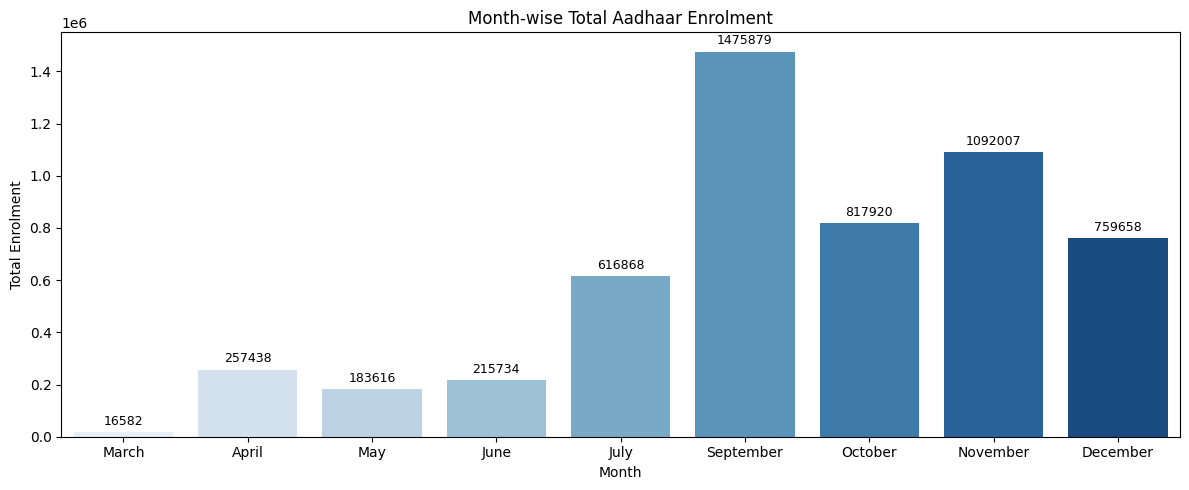

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert month number to month name
monthly_enrolment["month_name"] = pd.to_datetime(
    monthly_enrolment["month"], format="%m"
).dt.month_name()

plt.figure(figsize=(12, 5))

ax = sns.barplot(
    data=monthly_enrolment,
    x="month_name",
    y="total_enrolment",
    palette="Blues"
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.0f",   # no decimals
        padding=3,
        fontsize=9
    )

plt.xlabel("Month")
plt.ylabel("Total Enrolment")
plt.title("Month-wise Total Aadhaar Enrolment")

plt.tight_layout()
plt.show()


In [472]:
df_enrol.head(10)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_spell_flag,state_clean,state_final,state_final_nonvalid,total_enrolment,month
0,2025-03-02,MEGHALAYA,East Khasi Hills,793121,11,61,37,0,MEGHALAYA,MEGHALAYA,0,109,3
1,2025-03-09,KARNATAKA,Bengaluru Urban,560043,14,33,39,0,KARNATAKA,KARNATAKA,0,86,3
2,2025-03-09,UTTAR PRADESH,Kanpur Nagar,208001,29,82,12,0,UTTAR PRADESH,UTTAR PRADESH,0,123,3
3,2025-03-09,UTTAR PRADESH,Aligarh,202133,62,29,15,0,UTTAR PRADESH,UTTAR PRADESH,0,106,3
4,2025-03-09,KARNATAKA,Bengaluru Urban,560016,14,16,21,0,KARNATAKA,KARNATAKA,0,51,3
5,2025-03-09,BIHAR,Sitamarhi,843331,20,49,12,0,BIHAR,BIHAR,0,81,3
6,2025-03-09,BIHAR,Sitamarhi,843330,23,24,42,0,BIHAR,BIHAR,0,89,3
7,2025-03-09,UTTAR PRADESH,Bahraich,271865,26,60,14,0,UTTAR PRADESH,UTTAR PRADESH,0,100,3
8,2025-03-09,UTTAR PRADESH,Firozabad,283204,28,26,10,0,UTTAR PRADESH,UTTAR PRADESH,0,64,3
9,2025-03-09,BIHAR,Purbi Champaran,845418,30,48,10,0,BIHAR,BIHAR,0,88,3
